In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from stix2.v21 import (ThreatActor, Identity, AttackPattern, Campaign, IntrusionSet, Relationship, ExternalReference, Bundle, Grouping)
from efficient_apriori import apriori
import re
from pyattck import Attck
import requests
from stix2 import MemoryStore, Filter

In [2]:
df = pd.read_csv("Categorized_Adversary_TTPs.csv") # sample dataset of attacks
df.head()

,mitre_attack_id,mitre_attack_name,mitre_attack_aliases,mitre_attack_created,mitre_attack_last_modified,etda_id,etda_name,etda_aliases,etda_first_seen,country,motivation,victim_industries,victim_countries,mitre_attack_ttps
0,intrusion-set--dc5e2999-ca1a-47d4-8d12-a6984b1...,UNC2452,"['UNC2452', 'NOBELIUM', 'StellarParticle', 'Da...",2021-01-05,2021-05-04,93ba9804-335e-4782-855d-40af22b93201,"APT 29, Cozy Bear, The Dukes","['APT 29', 'Cozy Bear', 'The Dukes', 'Group 10...",2008,RU,['Information theft and espionage'],"['Defense', 'Energy', 'Government', 'Law enfor...","['Australia', 'Azerbaijan', 'Belarus', 'Belgiu...","['T1484.002', 'T1071.001', 'T1053.005', 'T1036..."
1,intrusion-set--8f5e8dc7-739d-4f5e-a8a1-a66e004...,Cleaver,"['Cleaver', 'Threat Group 2889', 'TG-2889']",2017-05-31,2021-10-12,4622bc44-8c01-4807-8d12-b22352472c29,"Cutting Kitten, TG-2889","['Cutting Kitten', 'TG-2889', 'Operation “Clea...",2012,IR,['Information theft and espionage'],"['Aerospace', 'Aviation', 'Chemical', 'Defense...","['Canada', 'China', 'France', 'Germany', 'Indi...","['T1588.002', 'T1003.001', 'T1587.001', 'T1585..."
2,intrusion-set--0ea72cd5-ca30-46ba-bc04-378f701...,GCMAN,['GCMAN'],2017-05-31,2020-03-30,e6eeb30a-a941-46f9-8340-20958f1d6cb0,GCMAN,['GCMAN'],2016,RU,['Financial crime'],['Financial'],['Russia'],"['T1021.005', 'T1021.004']"
3,intrusion-set--dd2d9ca6-505b-4860-a604-233685b...,Wizard Spider,"['Wizard Spider', 'UNC1878', 'TEMP.MixMaster',...",2020-05-12,2021-10-14,480940e0-47b0-4295-9067-c2500ccfdaec,"Wizard Spider, Gold Blackburn","['Wizard Spider', 'Grim Spider', 'TEMP.MixMast...",2014,RU,"['Financial crime', 'Financial gain']","['Defense', 'Financial', 'Government', 'Health...",None Provided,"['T1053.005', 'T1033', 'T1070.004', 'T1059.003..."
4,intrusion-set--f9d6633a-55e6-4adc-9263-6ae0804...,Magic Hound,"['Magic Hound', 'TA453', 'COBALT ILLUSION', 'C...",2018-01-16,2022-04-17,bb9b25ed-9ddc-4f65-bd01-ab8d6efc34ac,"Magic Hound, APT 35, Cobalt Gypsy, Charming Ki...","['Magic Hound', 'APT 35', 'Cobalt Illusion', '...",2012,IR,['Information theft and espionage'],"['Defense', 'Energy', 'Financial', 'Government...","['Afghanistan', 'Canada', 'Egypt', 'Iran', 'Ir...","['T1071', 'T1564.003', 'T1560.001', 'T1586.002..."


In [3]:
def GenerateAprioriLists():
    # some data comes from this dataset with TTPs
    df = pd.read_csv("Categorized_Adversary_TTPs.csv") # sample dataset of attacks


    # more data is gained by using attck data from actors and malware TTPs
    attack = Attck()

    actors = {}
    for actor in attack.enterprise.actors:
        actors[actor.id] = actor
    malwares = attack.enterprise.malwares + attack.enterprise.tools
    ttpLists = []
    for malware in malwares:
        ttpLists.append(["'" + ttp.id + "'" for ttp in malware.techniques])

    # to use the apriori we need to generate a list of lists
    aprList = ttpLists
    for row in df.values:
        aprList.append((row[13].strip('][').split(', ')))
    return aprList

In [4]:
# calculate the support of a ttp value where data is a list of lists and ttps is a list of ttps
def calculateSupport(ttps, data):
    count = sum([1 for l in data if set(ttps).issubset(set(l))])
    support = count/len(data)
    return support

In [5]:
# calculates the confidence of 1:1 rule where data is a list of lists
# anticedant and consequent are lists such that anticedant -> consequent
def calculateConfidence(anticedant, consequent, data):
    if anticedant == consequent:
        return 1
    try:
        return calculateSupport(anticedant+consequent, data)/calculateSupport(anticedant, data)
    except:
        print(anticedant, consequent)
        return 0

In [9]:
def CorrelationMatrix()
# loop through set of all TTPs
ttps = sorted(list(set([item for sublist in aprList for item in sublist])))
ttps.pop(1)
size = len(ttps)
confidenceMatrix = []
supportMatrix = []

for rowTTP in ttps[0:size]:
    curRow = []
    for colTTP in ttps[0:size]:
        curRow.append(calculateConfidence([rowTTP], [colTTP], aprList))
    confidenceMatrix.append(curRow)

NameError: name 'aprList' is not defined

In [ ]:
plt.imshow(confidenceMatrix, cmap="coolwarm")
plt.show()

In [1]:
#ttps

In [39]:
for row in confidenceMatrix:
    print(row)

[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0]


In [48]:
confidenceMatrix[4][4]

1

In [ ]:
fig, ax = plt.subplots()
heatmap = ax.imshow(confidenceMatrix, cmap='coolwarm')
fig.colorbar(heatmap)


plt.show()

In [17]:
abstractData = aprList
for i in range(0,len(abstractData)):
    abstractData[i] = [re.sub(r'\.[0-9]+', '', ttp) for ttp in abstractData[i]]

In [18]:
ttps = sorted(list(set([item for sublist in abstractData for item in sublist if item != "''"])))
ttps.pop(1)
size = len(ttps)

confidenceMatrix = []
supportMatrix = []

for rowTTP in ttps[0:size]:
    curRow = []
    for colTTP in ttps[0:size]:
        curRow.append(calculateConfidence([rowTTP], [colTTP], aprList))
    confidenceMatrix.append(curRow)

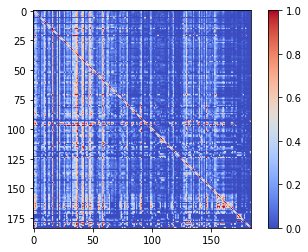

In [19]:
fig, ax = plt.subplots()
heatmap = ax.imshow(confidenceMatrix, cmap='coolwarm')
fig.colorbar(heatmap)


plt.show()

In [20]:
len(ttps)

184

In [21]:
# table of rules and then support, lift, confidence 
size

184

In [10]:
import requests
from stix2 import MemoryStore, Filter

def get_data_from_branch(domain):
    """get the ATT&CK STIX data from MITRE/CTI. Domain should be 'enterprise-attack', 'mobile-attack' or 'ics-attack'. Branch should typically be master."""
    stix_json = requests.get(f"https://raw.githubusercontent.com/mitre-attack/attack-stix-data/master/{domain}/{domain}.json").json()
    return MemoryStore(stix_data=stix_json["objects"])

src = get_data_from_branch("enterprise-attack")

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [24]:
import pandas as pd
data = pd.DataFrame(confidenceMatrix)
data.columns = ttps
data.index = ttps

In [29]:
ttps = ttps[1:]

In [30]:
ttpMaps = {} # dictionary to associate ttp with tactics
for ttp in ttps:
    ttpMaps[ttp] = src.query([ Filter("external_references.external_id", "=", ttp[1:-1]) ])[0]["kill_chain_phases"][0]["phase_name"]

In [15]:
ttpTactics = ["Reconnaissance", "Resource-Development", "Initial-Access", "Execution", "Persistence", "Privilege-Escalation", "Defense-Evasion", "Credential-Access", "Discovery", "Lateral-Movement", "Collection", "Command-and-Control", "Exfiltration", "Impact"]

In [32]:
xtics = [0]
for lab in ttpTactics:
    print(lab, list(ttpMaps.values()).count(lab.lower()))
    xtics.append(xtics[-1]+list(ttpMaps.values()).count(lab.lower()))
xtics = xtics[1:]
xtics

Reconnaissance 8
Resource-Development 7
Initial-Access 5
Execution 11
Persistence 13
Privilege-Escalation 4
Defense-Evasion 33
Credential-Access 14
Discovery 25
Lateral-Movement 7
Collection 15
Command-and-Control 19
Exfiltration 8
Impact 13


[8, 15, 20, 31, 44, 48, 81, 95, 120, 127, 142, 161, 169, 182]

In [33]:
list(set(ttpMaps.values()))

['execution',
 'lateral-movement',
 'initial-access',
 'exfiltration',
 'impact',
 'persistence',
 'command-and-control',
 'privilege-escalation',
 'credential-access',
 'resource-development',
 'defense-evasion',
 'collection',
 'reconnaissance',
 'discovery']

In [34]:
ttps = []
for t in list(set(ttpMaps.values())):
    ttps += list(filter(lambda x: ttpMaps[x] == t, ttpMaps))
print(len(ttps))
size = len(ttps)

confidenceMatrix = []
supportMatrix = []

for rowTTP in ttps[0:size]:
    curRow = []
    for colTTP in ttps[0:size]:
        curRow.append(calculateConfidence([rowTTP], [colTTP], aprList))
    confidenceMatrix.append(curRow)

182


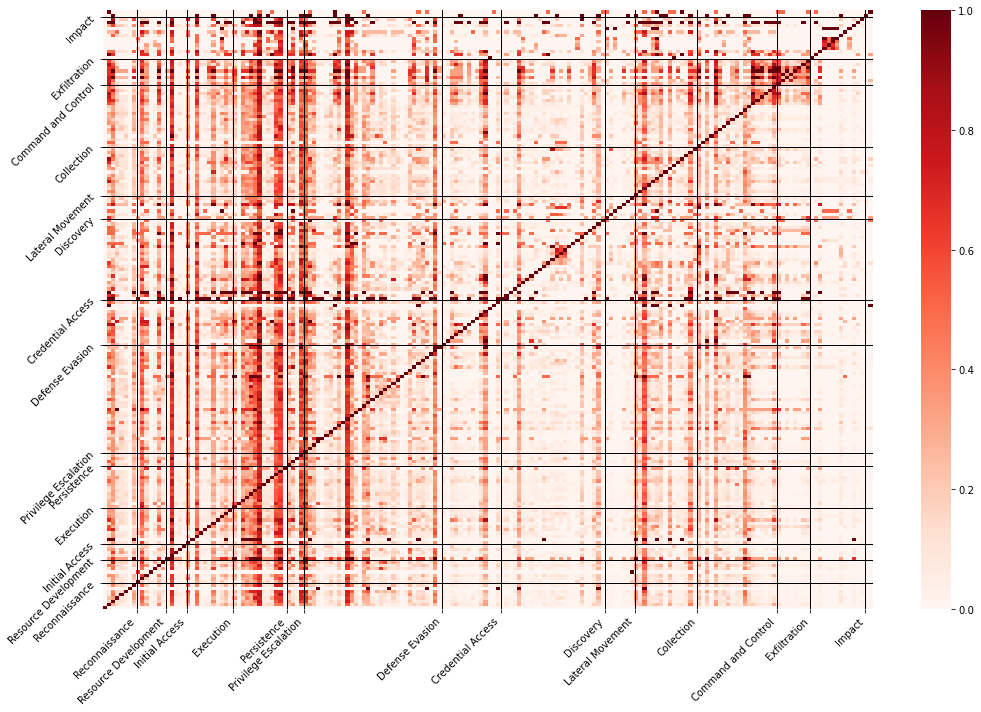

In [56]:
x_labels = ["Reconnaissance", "Resource Development", "Initial Access", "Execution", "Persistence", "Privilege Escalation", "Defense Evasion", "Credential Access", "Discovery", "Lateral Movement", "Collection", "Command and Control", "Exfiltration", "Impact"]
y_labels = x_labels

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data, cmap="Reds", cbar=True, ax=ax)
x_tick_positions = np.linspace(0, data.shape[1], len(x_labels), endpoint=True)
y_tick_positions = np.linspace(0, data.shape[0], len(y_labels), endpoint=True)
ax.set_xticks(xtics)
ax.set_yticks(xtics)
ax.set_xticklabels(x_labels, rotation = 45, ha="right")
ax.set_yticklabels(y_labels, rotation = 45, ha='right')
ax.grid(True, which='both', color='black', linewidth=1)


# plt.xlim(150, 180)
# plt.ylim(150, 180)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [64]:
# ttps = sorted(list(set([item for sublist in aprList for item in sublist if item != "''"])))
# ttps.pop(1)
# size = len(ttps)

# confidenceMatrix = []
# supportMatrix = []

# for rowTTP in ttps[0:size]:
#     curRow = []
#     for colTTP in ttps[0:size]:
#         curRow.append(calculateConfidence([rowTTP], [colTTP], aprList))
#     confidenceMatrix.append(curRow)

KeyboardInterrupt: 

In [11]:
aprList = GenerateAprioriLists()

In [12]:
ttps = sorted(list(set([item for sublist in aprList for item in sublist if item != "''"])))
ttps = ttps[1:]
ttps[0:4]

["'T1001'", "'T1001.001'", "'T1001.002'", "'T1001.003'"]

In [13]:
ttpMaps = {} # dictionary to associate ttp with tactics
for ttp in ttps:
    ttpMaps[ttp] = src.query([ Filter("external_references.external_id", "=", ttp[1:-1]) ])[0]["kill_chain_phases"][0]["phase_name"]

In [16]:
xtics = [0]
for lab in ttpTactics:
    print(lab, list(ttpMaps.values()).count(lab.lower()))
    xtics.append(xtics[-1]+list(ttpMaps.values()).count(lab.lower()))
xtics = xtics[1:]
xtics

Reconnaissance 21
Resource-Development 30
Initial-Access 9
Execution 25
Persistence 60
Privilege-Escalation 19
Defense-Evasion 118
Credential-Access 50
Discovery 35
Lateral-Movement 13
Collection 29
Command-and-Control 41
Exfiltration 12
Impact 18


[21, 51, 60, 85, 145, 164, 282, 332, 367, 380, 409, 450, 462, 480]

In [17]:
ttps = []
for t in list(set(ttpMaps.values())):
    ttps += list(filter(lambda x: ttpMaps[x] == t, ttpMaps))
print(ttps[0:4])
size = len(ttps)

confidenceMatrix = []
supportMatrix = []

for rowTTP in ttps[0:size]:
    curRow = []
    for colTTP in ttps[0:size]:
        curRow.append(calculateConfidence([rowTTP], [colTTP], aprList))
    confidenceMatrix.append(curRow)

["'T1014'", "'T1027'", "'T1027.001'", "'T1027.002'"]


In [21]:
data = pd.DataFrame(confidenceMatrix)
data.columns = ttps
data.index = ttps

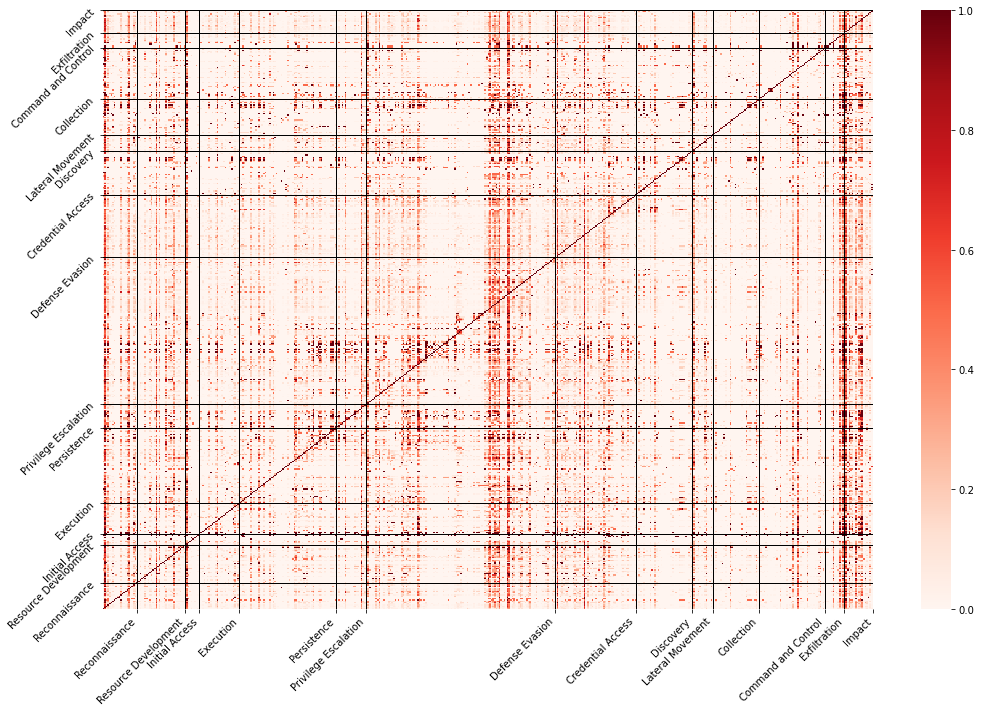

In [22]:
x_labels = ["Reconnaissance", "Resource Development", "Initial Access", "Execution", "Persistence", "Privilege Escalation", "Defense Evasion", "Credential Access", "Discovery", "Lateral Movement", "Collection", "Command and Control", "Exfiltration", "Impact"]
y_labels = x_labels

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data, cmap="Reds", cbar=True, ax=ax)
x_tick_positions = np.linspace(0, data.shape[1], len(x_labels), endpoint=True)
y_tick_positions = np.linspace(0, data.shape[0], len(y_labels), endpoint=True)
ax.set_xticks(xtics)
ax.set_yticks(xtics)
ax.set_xticklabels(x_labels, rotation = 45, ha="right")
ax.set_yticklabels(y_labels, rotation = 45, ha='right')
ax.grid(True, which='both', color='black', linewidth=1)


# plt.xlim(150, 180)
# plt.ylim(150, 180)
ax.invert_yaxis()
plt.tight_layout()
plt.show()